# Прохоренко Олександр ФІ-21мн
## Lab 1: Базові алгоритми класифікації з використання бібліотеки Scikit-learn
## Breast Cancer Wisconsin (Diagnostic) Data Set
### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("data.csv")

In [375]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [377]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [378]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data['diagnosis'].replace(to_replace=['M', 'B'], value=[1, 0], inplace=True)
scaled_data = (data-data.min())/(data.max()-data.min())

In [379]:
scaled_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [380]:
scaled_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


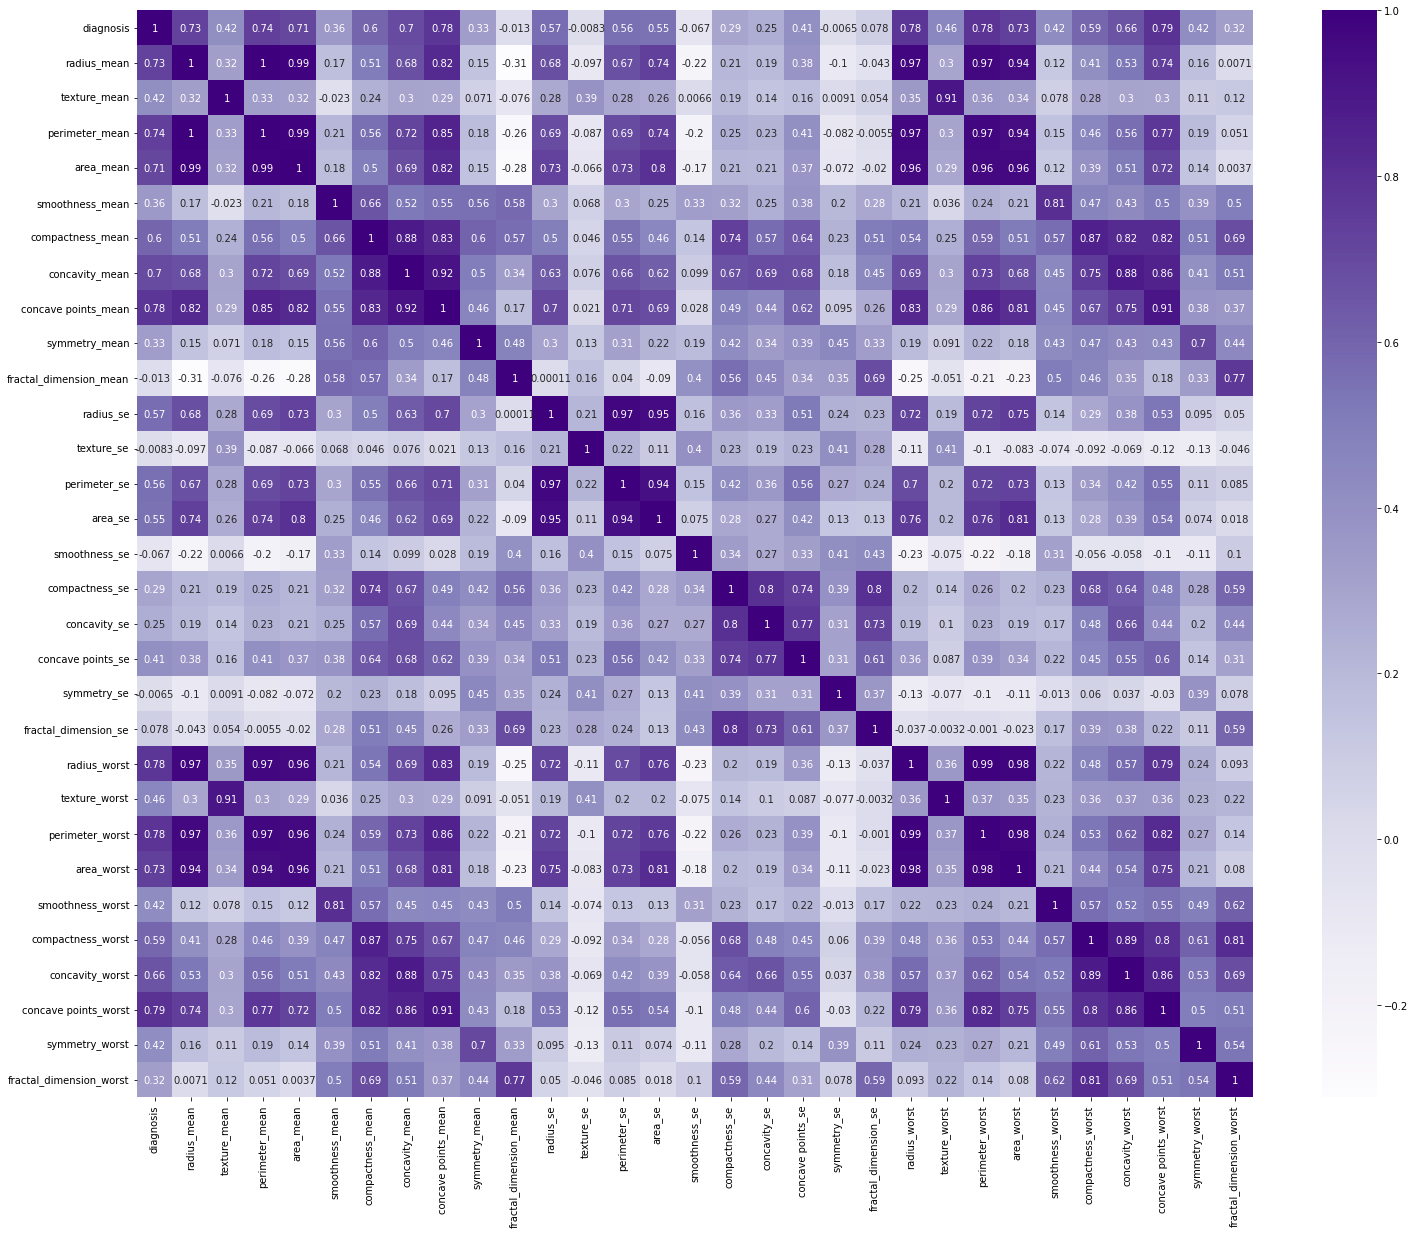

In [381]:
plt.figure(figsize = (25, 20))
seaborn.heatmap(scaled_data.corr(), annot = True, cmap="Purples")
plt.show()

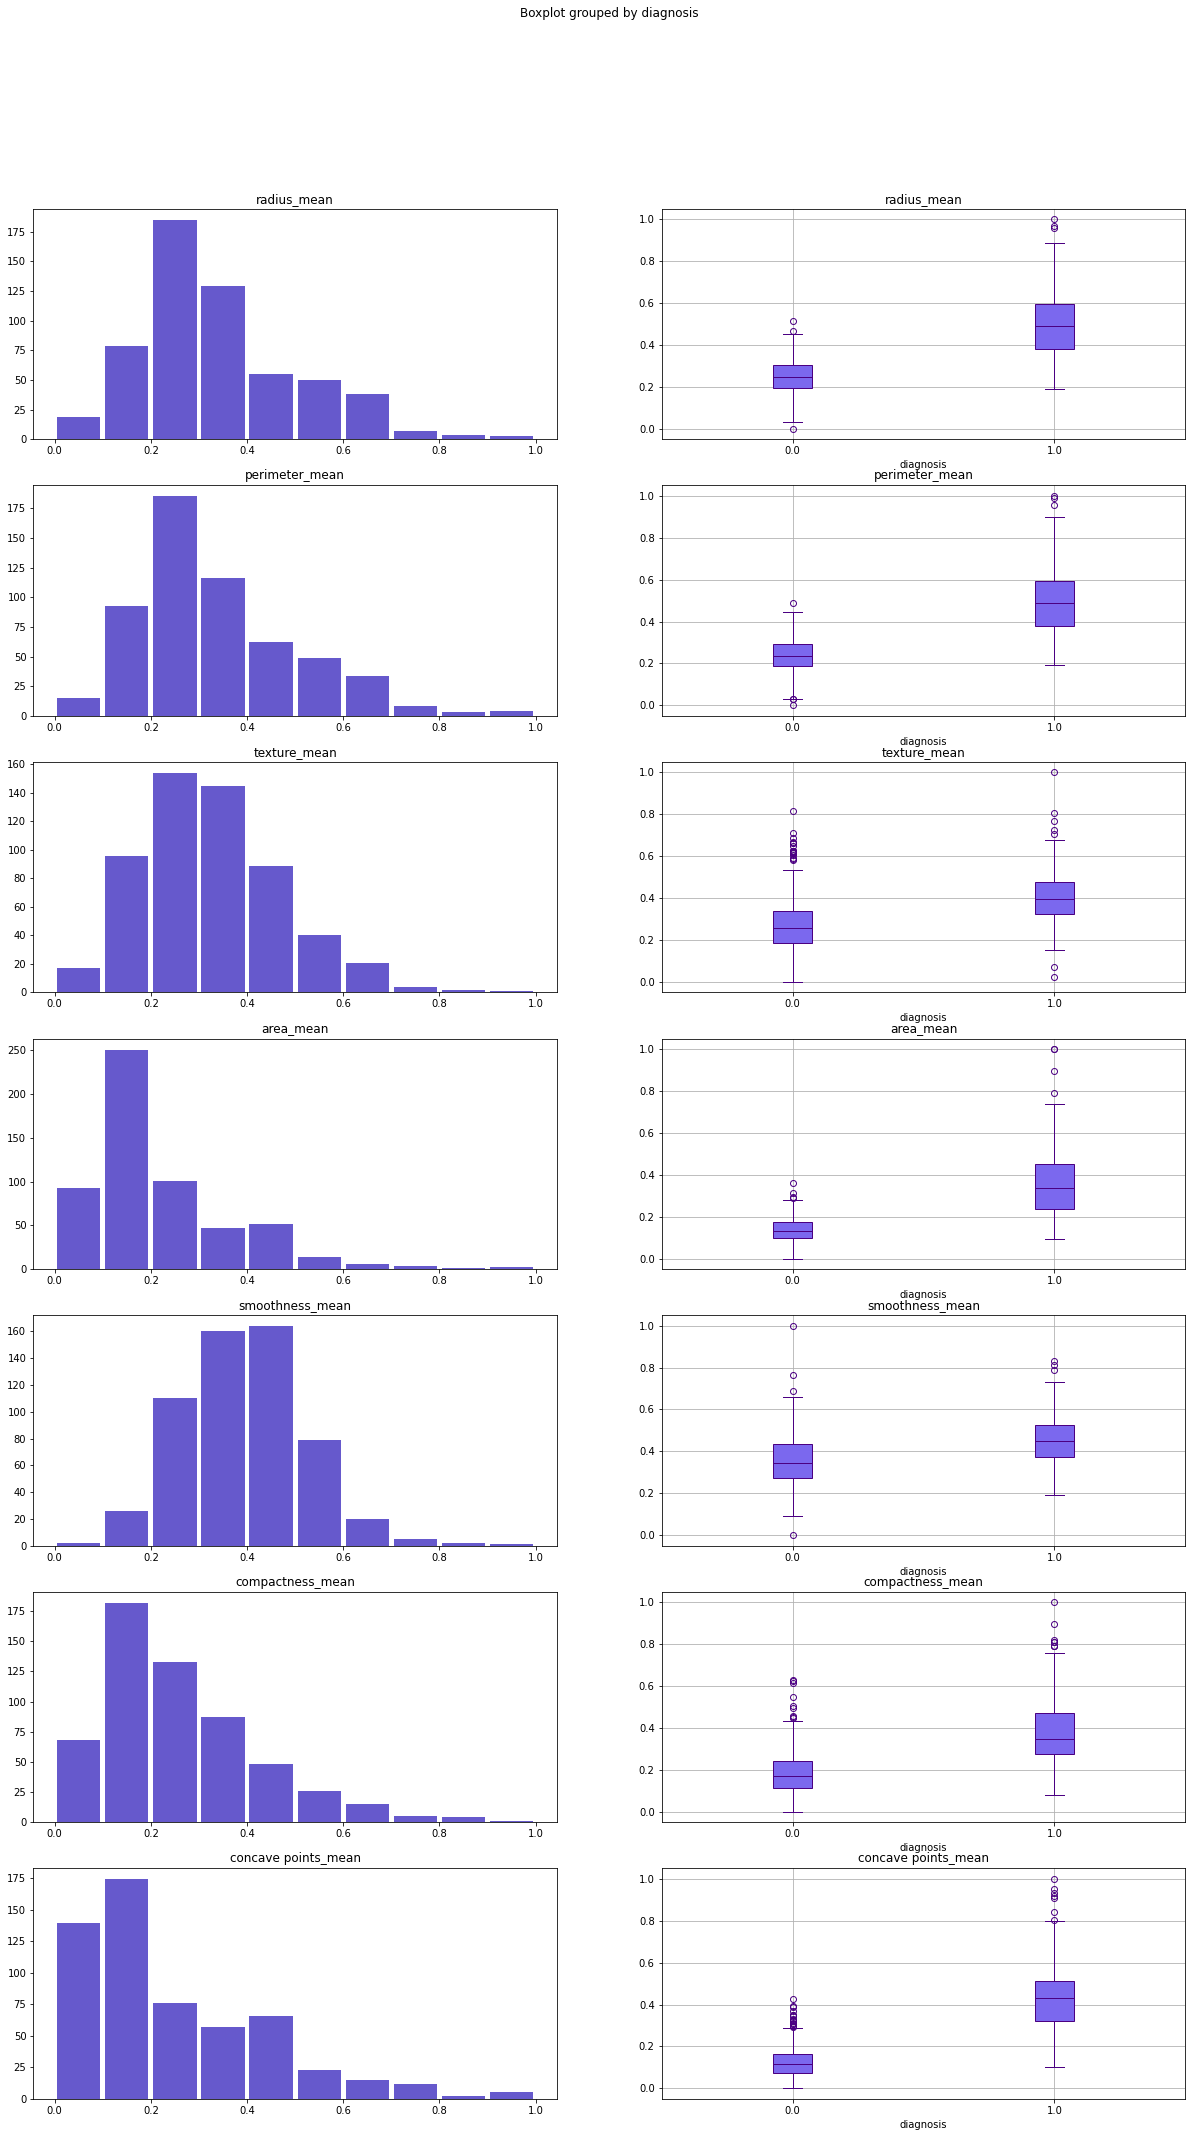

In [382]:
fig = plt.figure(figsize = (20, 35))
ax11 = fig.add_subplot(7,2,1)
ax12 = fig.add_subplot(7,2,2)
ax11.set_title("radius_mean")
ax11.hist(scaled_data['radius_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
c1 = "mediumslateblue"
c2 = "indigo"
scaled_data.boxplot(column='radius_mean',by='diagnosis', ax=ax12, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))


ax21 = fig.add_subplot(7,2,3)
ax22 = fig.add_subplot(7,2,4)
ax21.set_title("perimeter_mean")
ax21.hist(scaled_data['perimeter_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='perimeter_mean',by='diagnosis', ax=ax22, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))

ax31 = fig.add_subplot(7,2,5)
ax32 = fig.add_subplot(7,2,6)
ax31.set_title("texture_mean")
ax31.hist(scaled_data['texture_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='texture_mean',by='diagnosis', ax=ax32, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))

ax41 = fig.add_subplot(7,2,7)
ax42 = fig.add_subplot(7,2,8)
ax41.set_title("area_mean")
ax41.hist(scaled_data['area_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='area_mean',by='diagnosis', ax=ax42, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))

ax51 = fig.add_subplot(7,2,9)
ax52 = fig.add_subplot(7,2,10)
ax51.set_title("smoothness_mean")
ax51.hist(scaled_data['smoothness_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='smoothness_mean',by='diagnosis', ax=ax52, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))

ax61 = fig.add_subplot(7,2,11)
ax62 = fig.add_subplot(7,2,12)
ax61.set_title("compactness_mean")
ax61.hist(scaled_data['compactness_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='compactness_mean',by='diagnosis', ax=ax62, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))

ax71 = fig.add_subplot(7,2,13)
ax72 = fig.add_subplot(7,2,14)
ax71.set_title("concave points_mean")
ax71.hist(scaled_data['concave points_mean'], bins=10, color=(0.4,0.35,0.8), rwidth=0.9)
scaled_data.boxplot(column='concave points_mean',by='diagnosis', ax=ax72, patch_artist=True,
              boxprops=dict(facecolor=c1, color=c2), capprops=dict(color=c2),
              whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2))
plt.show()

In [383]:
import sklearn.model_selection

train, test = sklearn.model_selection.train_test_split(scaled_data, train_size = 0.7, random_state = 100)
y_train = train.pop('diagnosis')
x_train = train
y_test = test.pop('diagnosis')
x_test = test

# KNN

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn5.fit(x_train, y_train)
knn3.fit(x_train, y_train)
knn1.fit(x_train, y_train)

y_pred_knn5 = knn5.predict(x_test)
y_pred_knn3 = knn3.predict(x_test)
y_pred_knn1 = knn1.predict(x_test)

print("Accuracy with k=5", accuracy_score(y_test, y_pred_knn5))
print("Accuracy with k=3", accuracy_score(y_test, y_pred_knn3))
print("Accuracy with k=1", accuracy_score(y_test, y_pred_knn1))

Accuracy with k=5 0.9532163742690059
Accuracy with k=3 0.9824561403508771
Accuracy with k=1 0.9766081871345029


# Decision Tree

In [385]:
from sklearn.tree import DecisionTreeClassifier

dtc_def = DecisionTreeClassifier()
dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20, max_features="sqrt")
dtc_2 = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=10, max_features="auto")

dtc_def = dtc_def.fit(x_train,y_train)
dtc_1 = dtc_1.fit(x_train,y_train)
dtc_2 = dtc_2.fit(x_train,y_train)

y_pred_dtc_def = dtc_def.predict(x_test)
y_pred_dtc_1 = dtc_1.predict(x_test)
y_pred_dtc_2 = dtc_2.predict(x_test)

print("Accuracy with default:",accuracy_score(y_test, y_pred_dtc_def))
print("Accuracy with 1:",accuracy_score(y_test, y_pred_dtc_1))
print("Accuracy with 2:",accuracy_score(y_test, y_pred_dtc_2))

Accuracy with default: 0.935672514619883
Accuracy with 1: 0.9649122807017544
Accuracy with 2: 0.935672514619883


# SVM

In [386]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svc_def = SVC()  
svc_gsp = SVC(C=10, gamma=1)
  
svc_def = svc_def.fit(x_train, y_train)
svc_gsp = svc_gsp.fit(x_train, y_train)

y_pred_svc_def = svc_def.predict(x_test)
y_pred_svc_gsp = svc_gsp.predict(x_test)

print("DEFAULT:")
print(classification_report(y_test, y_pred_svc_def))
print("CONFUSION MATRIX\n",confusion_matrix(y_test, y_pred_svc_def))
print("\nWITH GRID SEARCH PARAMETERS:")
print(classification_report(y_test, y_pred_svc_gsp))
print("CONFUSION MATRIX\n",confusion_matrix(y_test, y_pred_svc_gsp))

DEFAULT:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       102
         1.0       1.00      0.93      0.96        69

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

CONFUSION MATRIX
 [[102   0]
 [  5  64]]

WITH GRID SEARCH PARAMETERS:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       102
         1.0       1.00      0.93      0.96        69

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

CONFUSION MATRIX
 [[102   0]
 [  5  64]]


In [387]:
from sklearn.model_selection import GridSearchCV

gsp = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
svc_gsp = GridSearchCV(SVC(), gsp, refit = True, verbose = 3)
svc_gsp = svc_gsp.fit(x_train, y_train)
print("Best parameters are ",svc_gsp.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.963 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.975 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.949 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.937 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.863 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.912 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.861 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.886 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

# Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier

rm_def=RandomForestClassifier()
rm_1=RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=10, random_state=20, max_features="sqrt")
rm_2=RandomForestClassifier(n_estimators=130, criterion='gini', max_depth=7, random_state=10, max_features="auto")

rm_def=rm_def.fit(x_train,y_train)
rm_1=rm_1.fit(x_train,y_train)
rm_2=rm_2.fit(x_train,y_train)

y_pred_rm_def=rm_def.predict(x_test)
y_pred_rm_1=rm_1.predict(x_test)
y_pred_rm_2=rm_2.predict(x_test)

print("Accuracy with default: ",accuracy_score(y_test, y_pred_rm_def))
print("Accuracy with 1: ",accuracy_score(y_test, y_pred_rm_1))
print("Accuracy with 2: ",accuracy_score(y_test, y_pred_rm_2))

Accuracy with default:  0.9590643274853801
Accuracy with 1:  0.9532163742690059
Accuracy with 2:  0.9649122807017544


# AdaBoost

In [389]:
from sklearn.ensemble import AdaBoostClassifier

ab_def = AdaBoostClassifier()
ab_1 = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 110, learning_rate = 1.7)
ab_2 = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 90, learning_rate = 1.3)
ab_3 = AdaBoostClassifier(algorithm = 'SAMME.R', n_estimators = 70, base_estimator = DecisionTreeClassifier(max_depth=3), learning_rate = 1.4)

ab_def = ab_def.fit(x_train, y_train)
ab_1 = ab_1.fit(x_train, y_train)
ab_2 = ab_2.fit(x_train, y_train)
ab_3 = ab_3.fit(x_train, y_train)

y_pred_ab_def = ab_def.predict(x_test)
y_pred_ab_1 = ab_1.predict(x_test)
y_pred_ab_2 = ab_2.predict(x_test)
y_pred_ab_3 = ab_3.predict(x_test)

print("Accuracy with default:",accuracy_score(y_test, y_pred_ab_def))
print("Accuracy with 1:",accuracy_score(y_test, y_pred_ab_1))
print("Accuracy with 2:",accuracy_score(y_test, y_pred_ab_2))
print("Accuracy with 3:",accuracy_score(y_test, y_pred_ab_3))

Accuracy with default: 0.9649122807017544
Accuracy with 1: 0.9824561403508771
Accuracy with 2: 0.9824561403508771
Accuracy with 3: 0.9707602339181286
